## Logistic Regression
### Generating Data

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75], [.75, 1]], num_observations)

simulated_seperableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

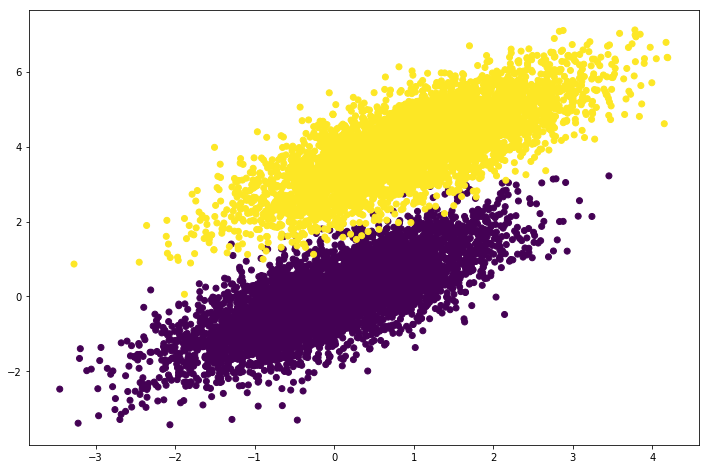

In [2]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_seperableish_features[:, 0], simulated_seperableish_features[:, 1], c = simulated_labels, alpha=4)

In [3]:
def sigmoid(scores):
    return 1/(1+np.exp(-scores))

In [4]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    return np.sum( target*scores - np.log(1 + np.exp(scores)))

In [15]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        if step % 1000 is 0:
            print(log_likelihood(features, target, weights))
            
    return weights 

In [30]:
weights = logistic_regression(simulated_seperableish_features, simulated_labels, num_steps=300000, 
                                  learning_rate=5e-5, add_intercept = True)


-4346.26477915
-240.69185706
-194.518077
-176.731346447
-167.145694373
-161.138640712
-157.032126246
-154.060706033
-151.822646821
-150.085899719
-148.706722768
-147.591195009
-146.675309315
-145.913932297
-145.274330037
-144.73219329
-144.269101853
-143.87085351
-143.526331491
-143.226717991
-142.964936231
-142.735247074
-142.532952456
-142.354174014
-142.19568559
-142.054784913
-141.929194203
-141.816982365
-141.716503521
-141.626348019
-141.545303072
-141.472320903
-141.406492788
-141.347027753
-141.293235011
-141.244509382
-141.200319128
-141.160195763
-141.123725467
-141.090541824
-141.060319659
-141.032769778
-141.007634469
-140.984683639
-140.963711488
-140.944533629
-140.926984598
-140.910915686
-140.896193049
-140.882696059
-140.870315859
-140.858954091
-140.848521782
-140.838938358
-140.830130776
-140.82203275
-140.814584071
-140.80773
-140.801420725
-140.795610882
-140.790259128
-140.785327748
-140.78078232
-140.776591402
-140.772726256
-140.769160596
-140.76587037
-140.7628

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_seperableish_features, simulated_labels)

print(clf.intercept_, clf.coef_)
print(weights)

[-13.99400797] [[-5.02712572  8.23286799]]
[-14.09225541  -5.05899648   8.28955762]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
data_with_intercept = np.hstack((np.ones((simulated_seperableish_features.shape[0], 1)), 
                                simulated_seperableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print('Accuracy from sklearn: {0}'.format(clf.score(simulated_seperableish_features, simulated_labels)))

Accuracy from scratch: 0.9947
Accuracy from sklearn: 0.9948


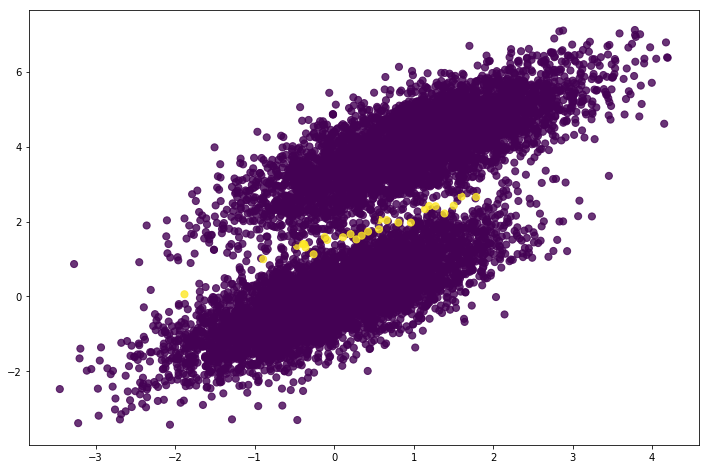

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_seperableish_features[:, 0], simulated_seperableish_features[:, 1], 
            c = preds == simulated_labels - 1, alpha = .8, s = 50)